# PROYECTO TELECOMUNICACIONES

https://drive.google.com/drive/folders/1BJFEyTlUUjf_oc716SupOxZdiSpTIcPl?usp=drive_link

Link carpeta drive

In [1]:
from myfunctions import * #trae las funciones desde mi python
import pandas as pd #convertir los archivos de entrada a dataframe

In [2]:
ds = pd.read_csv("datasets/telecom_dataset_us.csv")
client = pd.read_csv("datasets/telecom_clients_us.csv")

## EDA

### Observaciones iniciales

In [3]:
# Ver primeras filas de los datasets 
client.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [4]:
ds.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


Esta primera inspeccion nos permite comprobar si la informacion tecnica suministrada es correcta , y se comprueba que todo esta en orden como punto a mejorar se evidencia que no especifican las unidades de tiempo en las cuales miden las llamadas se presupone que están en minutos.

En teoria contamos con 731 clientes y dentro de la informacion de los mismos no encontramos valores nulos , procedemos a comprobar si hay repetidos y a cambiar la columna de date_start de objet a time y el user_id de entero a object dado que no es un valor cuantitaivo sino que obedece a una aignacion fija del cliente.

In [5]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [7]:
ds.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


Se completa el procedimiento satisfactoriamente.

Contamos con muchas mas columnas y filas en este dataset , en el tema de las filas es perfectamente normal dado que una persona puede llamar varias veces , user_id se cambiara a object , el date a fecha , operator id a entero , las demas columnas se mantendran igual , hay una posibilidad de eliminar los faltantes de la columna operator_id pero hay que estudiarlo bien.

### Ajustes Dtype

In [8]:
cambiar_tipo(client)

Columna 'user_id' convertida a object (string).
columna 'date_start' convertida a datetime.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    object        
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 17.3+ KB


Se aplica la función obteniendo los cambios pertinentes y verificando que se hayan dado correctamente.

In [9]:
cambiar_tipo(ds)

Columna 'user_id' convertida a object (string).
columna 'date' convertida a datetime.
Columna 'operator_id' convertida a object (string).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   user_id              53902 non-null  object                   
 1   date                 53902 non-null  datetime64[ns, UTC+03:00]
 2   direction            53902 non-null  object                   
 3   internal             53785 non-null  object                   
 4   operator_id          45730 non-null  object                   
 5   is_missed_call       53902 non-null  bool                     
 6   calls_count          53902 non-null  int64                    
 7   call_duration        53902 non-null  int64                    
 8   total_call_duration  53902 non-null  int64                    
dtypes

Se repite el proceso verificando que la funcion aplique los cambios de manera optima.

### Manejo Valores Nulos

In [10]:
nulos_analisis(client)

La columna user_id no tiene valores nulos.
La columna tariff_plan no tiene valores nulos.
La columna date_start no tiene valores nulos.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    object        
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 17.3+ KB


En el dataframe de clientes no se encuentran valores nulos .

In [11]:
nulos_analisis(ds)

La columna user_id no tiene valores nulos.
La columna date no tiene valores nulos.
La columna direction no tiene valores nulos.
La cantidad de nulos para la columna internal es de 117,
 puedes usar la funcion eliminar_nulos!!!si lo consideras correcto,
lo que representa un 0.22% del total de filas
La cantidad de nulos para la columna operator_id es de 8172,
 puedes usar la funcion eliminar_nulos!!!si lo consideras correcto,
lo que representa un 15.16% del total de filas
La columna is_missed_call no tiene valores nulos.
La columna calls_count no tiene valores nulos.
La columna call_duration no tiene valores nulos.
La columna total_call_duration no tiene valores nulos.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   user_id              53902 non-null  object                   
 1   date   

Analizando los valores nulos en cuanto a la columna de internal al representar un porcentaje tan bajo se van a retirar del dataframe , en el caso de operator_id se realizara lo mismo dado que el fin de este analisis es encontrar los operadores ineficazes y sin su id es imposible rastrear el mismo , por tanto se van a eliminar pero se enviara un reporte a marketing dado que es imperativo que se agregue el operator_id para no generar desviaciones.

In [12]:
eliminar_nulos(ds,['operator_id' , 'internal'])

Se eliminaron las filas con nulos en las columnas: ['operator_id', 'internal']


Se eliminan los nulos y se verifica.

### Analisis duplicados

In [13]:
analisis_duplicados(client)

No hay filas duplicadas en el DataFrame.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    object        
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 17.3+ KB


El dataframe de clientes no tiene filas duplicadas.

In [14]:
analisis_duplicados(ds)

Hay 4179 filas duplicadas.
El porcentaje de filas duplicadas es: 9.15%


<class 'pandas.core.frame.DataFrame'>
Index: 45670 entries, 1 to 53900
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   user_id              45670 non-null  object                   
 1   date                 45670 non-null  datetime64[ns, UTC+03:00]
 2   direction            45670 non-null  object                   
 3   internal             45670 non-null  object                   
 4   operator_id          45670 non-null  object                   
 5   is_missed_call       45670 non-null  bool                     
 6   calls_count          45670 non-null  int64                    
 7   call_duration        45670 non-null  int64                    
 8   total_call_duration  45670 non-null  int64                    
dtypes: bool(1), datetime64[ns, UTC+03:00](1), int64(3), object(4)
memory us

Inspeccionando el tema de duplicados llama la atencion la cantidad de los mismos se ratificia que son errores dado la fecha y hora es exacta ademas de la informacion de las demas columnas por tanto se toma la decision de eliminar estas filas duplicadas.

In [15]:
ds = ds.drop_duplicates()
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41491 entries, 1 to 53899
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   user_id              41491 non-null  object                   
 1   date                 41491 non-null  datetime64[ns, UTC+03:00]
 2   direction            41491 non-null  object                   
 3   internal             41491 non-null  object                   
 4   operator_id          41491 non-null  object                   
 5   is_missed_call       41491 non-null  bool                     
 6   calls_count          41491 non-null  int64                    
 7   call_duration        41491 non-null  int64                    
 8   total_call_duration  41491 non-null  int64                    
dtypes: bool(1), datetime64[ns, UTC+03:00](1), int64(3), object(4)
memory usage: 2.9+ MB


Se eliminan los duplicados y se revisa que los cambios se mantengan

In [16]:
ds['waiting_time'] = ds['total_call_duration']-ds['call_duration'] 

Dado que es un parametro necesario para el analisis se calcula el tiempo de espera y se agrega al df original de manera manual.

## Identificacion operadores ineficacez

### Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas).

In [17]:
i_perdidas = agrup_condicion(ds,'is_missed_call',True,'is_missed_call','count','operator_id')
i_perdidas.columns=(['operator_id','total_perdidas'])
i_perdidas

,operator_id,total_perdidas
63,891410.0,119
24,885876.0,115
64,891414.0,113
166,901880.0,111
89,893804.0,110
...,...,...
17,884402.0,1
875,973120.0,1
864,970244.0,1
200,905308.0,1


Mediante la funcion de grupar bajo 2 condiciones se filtran las llamadas perdidas , y con una funcion de agregacion se cuenta la cantidad de las mimsas esto agrupandolas por operador.

###  Se considera que un operador es ineficaz si tiene un tiempo de espera prolongado para las llamadas entrantes

In [18]:
i_espera = agrup_condicion(ds,"direction","in","waiting_time","mean","operator_id")
i_espera.columns=(['operator_id','promedio_tiempo_espera'])
i_espera

,operator_id,promedio_tiempo_espera
337,919794.0,1007.375000
335,919790.0,894.830508
206,906070.0,889.800000
445,931458.0,708.840000
358,921318.0,663.058824
...,...,...
404,926872.0,1.461538
677,952982.0,1.166667
636,948282.0,1.000000
644,949420.0,1.000000


Se repite el uso de la funcion de agrupacion en este caso se toman las llamadas que entran y se evalua el tiempo promedio que tiene de espera la llamada esto agrupado por cada operador.

### Se considera  que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

In [19]:
i_saliente = agrup_condicion(ds,"direction","out","user_id","count","operator_id")
i_saliente.columns=(['operator_id','total_salientes'])
i_saliente = i_saliente.sort_values(by='total_salientes')
i_saliente

,operator_id,total_salientes
8,882478.0,1
13,883018.0,1
14,883898.0,1
874,970258.0,1
833,960674.0,1
...,...,...
201,905538.0,191
24,885876.0,193
163,901880.0,194
27,887276.0,198


Por ultimo se evaluan los operadores con pocas llamadas salientes agrupando por operador , bajo la condicion de llamada de salida y contando las llamadas hechas.

### Operadores a deshabilitar


La cantidad de operadores ineficaces que se recomienda eliminar es de 44, equivalentes al 7.76% 
y son los siguientes: ['891410.0', '885876.0', '891414.0', '893804.0', '885890.0', '906406.0', '921818.0', '921318.0', '913942.0', '931458.0', '938896.0', '906404.0', '913938.0', '939762.0', '952948.0', '944220.0', '908958.0', '944226.0', '944216.0', '944218.0', '951508.0', '954650.0', '882690.0', '940588.0', '939370.0', '906408.0', '958460.0', '940630.0', '919554.0', '938414.0', '969272.0', '906070.0', '919552.0', '954750.0', '919204.0', '919792.0', '919206.0', '919164.0', '944210.0', '919166.0', '919790.0', '882688.0', '919794.0', '906076.0']


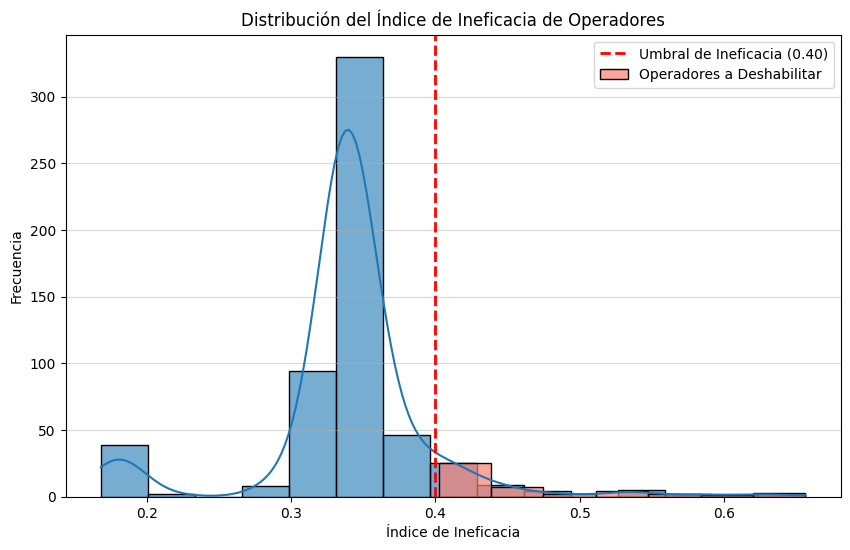

In [20]:
o_deshabilitar = identificar_operadores_a_deshabilitar(i_perdidas,i_espera,i_saliente,0.4)


Una vez se tenian los tres parametros demarcados para considerar que un operador es ineficaz se llama la funcion #identificar_operadores_a_deshabilitar# , en la cual se toman las viarables de llamadas entrantes perdidas y tiempo prolongado de espera de llamda , se normaliza la metrica mediante la funcion de la libreria scikit-learn  (MinMaxScaler) y se unen los dos dataframes , para el tema de las llamadas salientes hay que cambiar el enfoque dado que en este caso los ineficacez son los que menor cantidad de veces cumpplen con la condicion se tiene esto en cuenta , se normaliza y se unen los 3 dataframes , posterior a esto se establece el umbral que va a definir teniendo en cuenta la distribucion de los parametros que operadores se consideran ineficacez , en este caso se maneja un mismo nivel de ponderacion para los tres casos la grafica representa visualemente en que zona se encuentran los operadores a eliminar y la funcion misma arroja la cantidad de los mismos.

In [21]:
eliminar_operadores(ds,o_deshabilitar)

Operadores originales: 1092
Operadores actualizados: 1048


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,waiting_time
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18,8
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25,25
5,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,False,2,3,29,26
6,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50,50
10,166377,2019-08-06 00:00:00+03:00,out,False,881278.0,True,3,0,29,29
11,166377,2019-08-06 00:00:00+03:00,out,False,880020.0,True,5,0,70,70
12,166377,2019-08-06 00:00:00+03:00,out,True,881278.0,True,2,0,5,5
13,166377,2019-08-06 00:00:00+03:00,out,False,880020.0,False,5,800,819,19


Por ultimo haciendo uso de la funcion eliminar operadores , se eliminan de la base de datos original lo operadores a deshabilitar y la cantidad de los mismos reflejando cuantos habian inicalmente y cuantos quedaron posterior al analisis.

In [22]:
convertir_a_excel(ds,'datasets/telecom_dataset_us_clean.xlsx')

Archivo datasets/telecom_dataset_us_clean.xlsx creado exitosamente.


'datasets/telecom_dataset_us_clean.xlsx'

Se genera el dataset limpio en formato Excel.